In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# New Section

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/eda_ecommerce.csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.761905,26.14,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.761905,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.761905,16.22,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.761905,23.29,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.761905,30.21,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.380050,322.967430,307.58738,4.761905,15.380050,6.97270
std,26.494628,2.923431,11.709047,245.885557,234.17651,0.000000,11.709047,1.71858
min,10.080000,1.000000,0.510000,10.680000,10.17000,4.761905,0.510000,4.00000
25%,32.875000,3.000000,5.927500,124.425000,118.49750,4.761905,5.927500,5.50000
50%,55.230000,5.000000,12.090000,253.850000,241.76000,4.761905,12.090000,7.00000
75%,77.935000,8.000000,22.445000,471.350000,448.90500,4.761905,22.445000,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<ipython-input-9-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

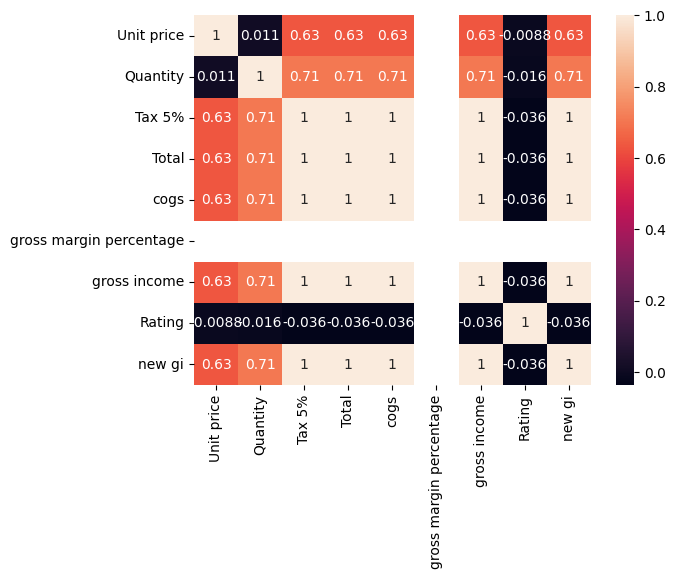

In [ ]:
sns.heatmap(df.corr(), annot=True)

First we drop unissasery columns like :

gross margin percentage.

tax is the same as gross incom so we drop gross incom.

In [ ]:
df = df.drop(columns = "gross margin percentage")
df = df.drop(columns = "gross income")

<ipython-input-11-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

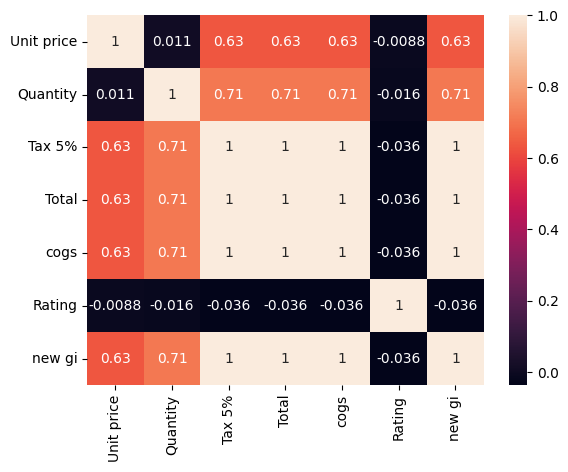

In [ ]:
sns.heatmap(df.corr(), annot=True)

based on the heatmap ("tax 5%","total","cogs","new ig","Branch","city") encodes the same information.

also "Invoice ID" gives no valiabol information.

I suggest to drop "cogs", "new ig" ,"city" and "Invoice ID"

In [ ]:
#df = df.drop(columns = "cogs")
#df = df.drop(columns = "new gi")
#df = df.drop(columns = "City")
#df = df.drop(columns = "Invoice ID")
#sns.heatmap(df.corr(), annot=True)

### 1.	Which Branch has higher sales?

I think the best way to answer this question by grouping each branch with its total sum.

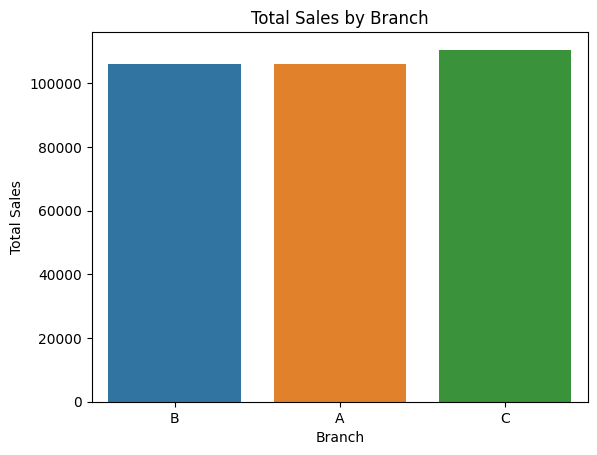

In [ ]:
branch_sales = df.groupby('Branch')['Total'].sum().sort_values()
sns.barplot(x=branch_sales.index, y=branch_sales.values)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Total Sales by Branch')
plt.show()


In [ ]:
branch_sales

Branch
B    106197.6720
A    106200.3705
C    110568.7065
Name: Total, dtype: float64

based on the chart the 3 branches has a very close sales values but branch C has the highest branch sales.

### 2.	Which Branch has higher customer satisfaction?

I think the best way to answer such question is by plotting the average rating on each branch.

In [ ]:
branch_ratings = df.groupby('Branch')['Rating'].mean().sort_values()
branch_ratings


Branch
B    6.818072
A    7.027059
C    7.072866
Name: Rating, dtype: float64

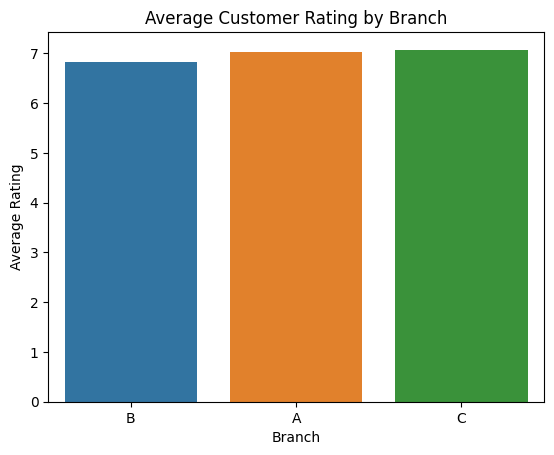

In [ ]:
sns.barplot(x=branch_ratings.index, y=branch_ratings.values)
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.title('Average Customer Rating by Branch')
plt.show()


based on df.describe() the over all avrage rating we get is 6.97270.

 all branches get almost the same avrage rating but C is the highest average rating with 7.072

### 3.	Which Product line has higher sales in general?

To answer this question I grouped the data by product line and sum the total sales

In [ ]:
product_line_sales = df.groupby('Product line')['Total'].sum().sort_values()
product_line_sales

Product line
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Fashion accessories       54305.8950
Electronic accessories    54337.5315
Sports and travel         55122.8265
Food and beverages        56144.8440
Name: Total, dtype: float64

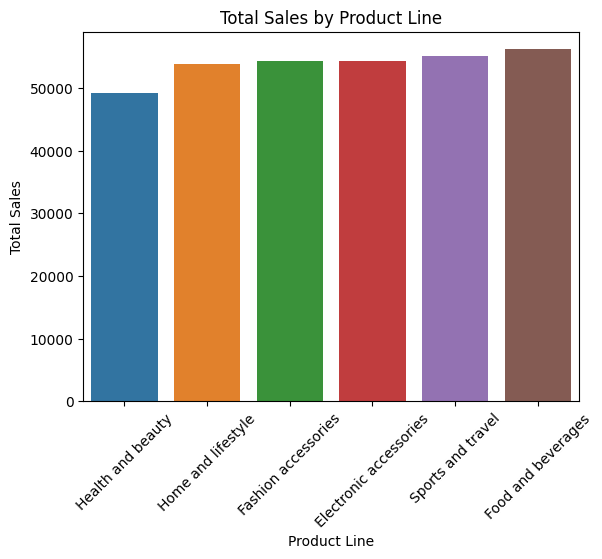

In [ ]:
sns.barplot(x=product_line_sales.index, y=product_line_sales.values)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.show()

It looks like there is no product line dominates sales. but food came on top.

# New Section2 nada will work here


##**shorouq**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**8.	What is the percentage of sales among all Months?**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

NameError: name 'df' is not defined

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df['Date'].values

array(['2019-01-05T00:00:00.000000000', '2019-03-08T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-01-27T00:00:00.000000000',
       '2019-02-08T00:00:00.000000000', '2019-03-25T00:00:00.000000000',
       '2019-02-25T00:00:00.000000000', '2019-02-24T00:00:00.000000000',
       '2019-01-10T00:00:00.000000000', '2019-02-20T00:00:00.000000000',
       '2019-02-06T00:00:00.000000000', '2019-03-09T00:00:00.000000000',
       '2019-02-12T00:00:00.000000000', '2019-02-07T00:00:00.000000000',
       '2019-03-29T00:00:00.000000000', '2019-01-15T00:00:00.000000000',
       '2019-03-11T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-03-11T00:00:00.000000000',
       '2019-02-25T00:00:00.000000000', '2019-03-05T00:00:00.000000000',
       '2019-03-15T00:00:00.000000000', '2019-02-17T00:00:00.000000000',
       '2019-03-02T00:00:00.000000000', '2019-03-22T00:00:00.000000000',
       '2019-02-08T00:00:00.000000000', '2019-03-10

In [ ]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,new gi,day,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,9.1,24.896667,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,9.6,3.638095,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,7.4,15.443333,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,8.4,22.179048,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,5.3,28.770000,8,2


In [ ]:
df['Time'].dtype

dtype('O')

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['hours'] = df['Time'].dt.hour

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,new gi,day,month,hours
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-01-05 13:08:00,Ewallet,522.83,9.1,24.896667,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-01-05 10:29:00,Cash,76.40,9.6,3.638095,8,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-01-05 13:23:00,Credit card,324.31,7.4,15.443333,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-01-05 20:33:00,Ewallet,465.76,8.4,22.179048,27,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-01-05 10:37:00,Ewallet,604.17,5.3,28.770000,8,2,10


In [ ]:
monthly_sales = df.groupby('month')['Total'].sum()
monthly_sales

month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

In [ ]:
percentage_sales_month = (monthly_sales/monthly_sales.sum())*100
percentage_sales_month

month
1    36.007381
2    30.101976
3    33.890643
Name: Total, dtype: float64

In [ ]:
plt.pie(labels= 'percentage_sales_month')

TypeError: pie() missing 1 required positional argument: 'x'

###**8.	What is the percentage of sales among all days?**

In [ ]:
daily_sales = df.groupby('day')['Total'].sum()
daily_sales

day
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     12798.6915
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5449.0485
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13398.1680
28     9326.1315
29     7539.8085
30     7045.3215
31     5232.4965
Name: Total, dtype: float64

In [ ]:
percentage_sales_daily = (daily_sales/daily_sales.sum())*100
percentage_sales_daily

day
1     3.041825
2     3.915808
3     3.839166
4     2.463914
5     3.962851
6     2.976227
7     3.560959
8     4.181166
9     4.262756
10    3.054556
11    2.978129
12    3.672608
13    1.687186
14    4.221903
15    4.866588
16    3.079983
17    3.225909
18    1.724430
19    4.608287
20    3.659841
21    1.753541
22    2.268416
23    3.848328
24    3.592313
25    3.647611
26    2.733467
27    4.148467
28    2.887644
29    2.334546
30    2.181439
31    1.620135
Name: Total, dtype: float64

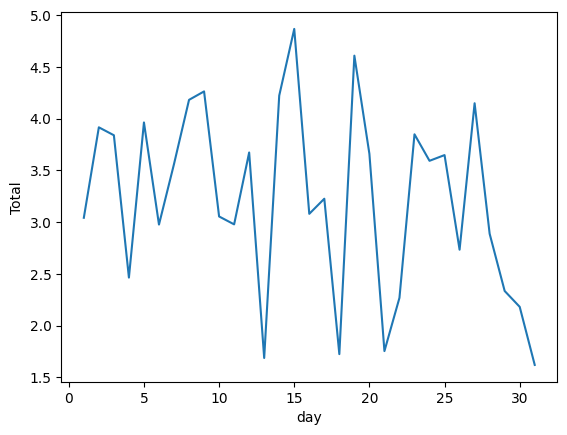

In [ ]:
sns.lineplot(x = percentage_sales_daily.index, y = percentage_sales_daily);

###**8.	What is the percentage of sales among all hours?**

In [ ]:
hour_sales = df.groupby('hours')['Total'].sum()
hour_sales

hours
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

In [ ]:
percentage_sales_hour = (hour_sales/hour_sales.sum())*100
percentage_sales_hour

hours
10     9.729014
11     9.405714
12     8.070764
13    10.751332
14     9.545379
15     9.654092
16     7.810811
17     7.568958
18     8.059758
19    12.292136
20     7.112041
Name: Total, dtype: float64

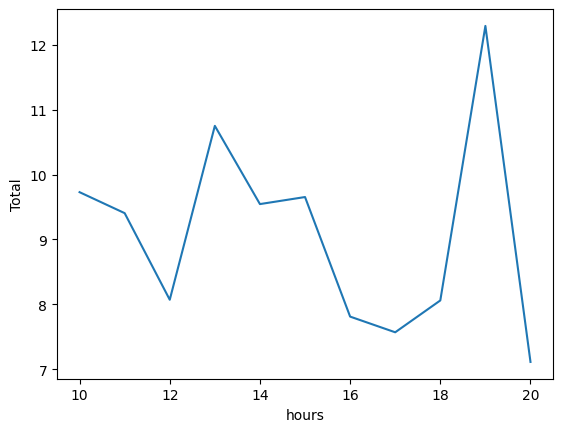

In [ ]:
sns.lineplot(x = percentage_sales_hour.index, y = percentage_sales_hour);

# New Section

5. What is the most used way of payment?


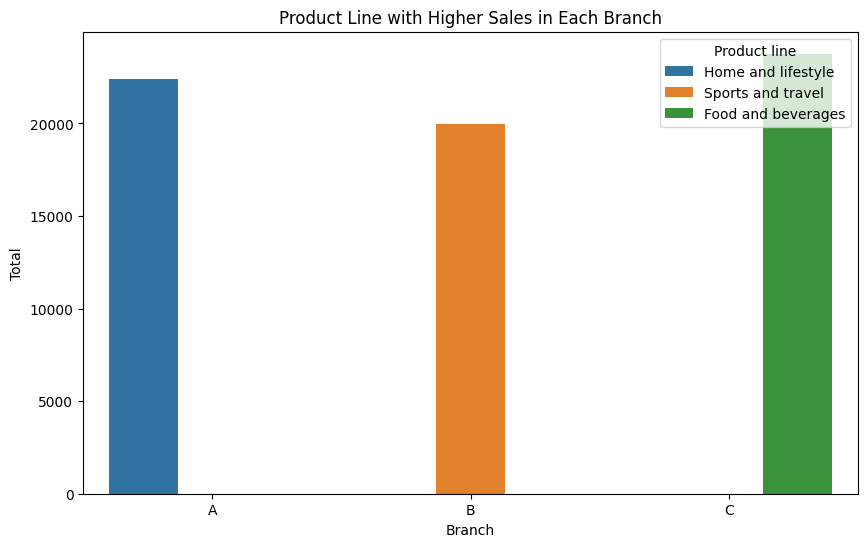

In [ ]:
payment_counts = df['Payment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', hue='Product line', data=top_product_lines)
plt.title('Product Line with Higher Sales in Each Branch')
plt.show()

6.Compare the Gross incomes for the all branches



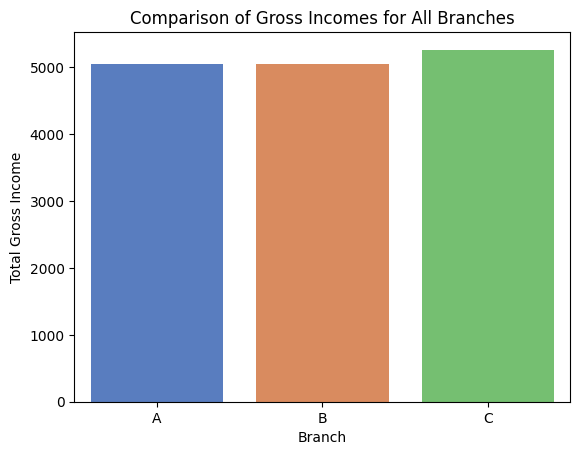

In [ ]:
branch_gross_income = df.groupby('Branch')['gross income'].sum().reset_index()

sns.barplot(x='Branch', y='gross income', data=branch_gross_income, palette='muted')
plt.title('Comparison of Gross Incomes for All Branches')
plt.xlabel('Branch')
plt.ylabel('Total Gross Income')
plt.show()

7. What is the Percentage of Member & Normal customers share in sales?


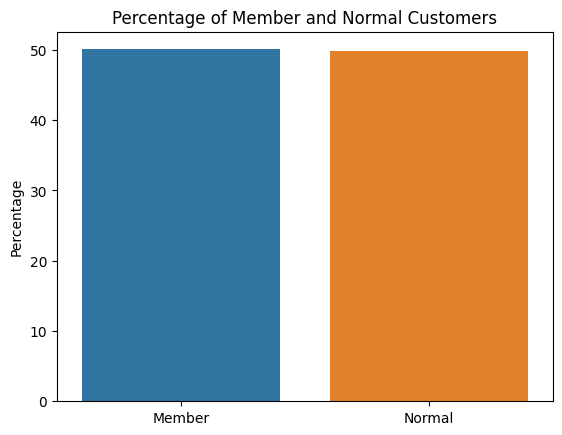

In [ ]:
customer_counts = df['Customer type'].value_counts()
total_customers = df['Customer type'].count()
percentage_member = (customer_counts['Member'] / total_customers) * 100
percentage_normal = (customer_counts['Normal'] / total_customers) * 100

sns.barplot(x=['Member', 'Normal'], y=[percentage_member, percentage_normal])
plt.title('Percentage of Member and Normal Customers')
plt.ylabel('Percentage')
plt.show()